<a href="https://colab.research.google.com/github/marceloccs/visualizacao-dados-trilha-6/blob/main/Trilha_6_Visualiza%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de base de dados com infomações do Udemy de 2012 até 2017

Instancia o objeto que vamos usar no resto da pesquisa, alem de importar e instala as libs necessarias para uso.

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install pandas-profiling==2.7.1

Preparando importings

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from pandas_profiling import ProfileReport
from datetime import datetime

Importando dataset e organizando objetos

In [ ]:
fields = ['is_paid', 'num_subscribers', 'num_reviews', 'level', 'price',
          'num_lectures', 'content_duration','published_timestamp','subject']

df = pd.read_csv('/content/drive/MyDrive/Pos-graduação (AI)/Trabalhos/Visualização de dados para tomada de decisão/udemy.zip',
                 parse_dates=['published_timestamp']
                )

Analise de perfil do meu dataFrame

In [ ]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Realizar a analise de cursos pagos e não pagos baseado no numero de reviews e subscribes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


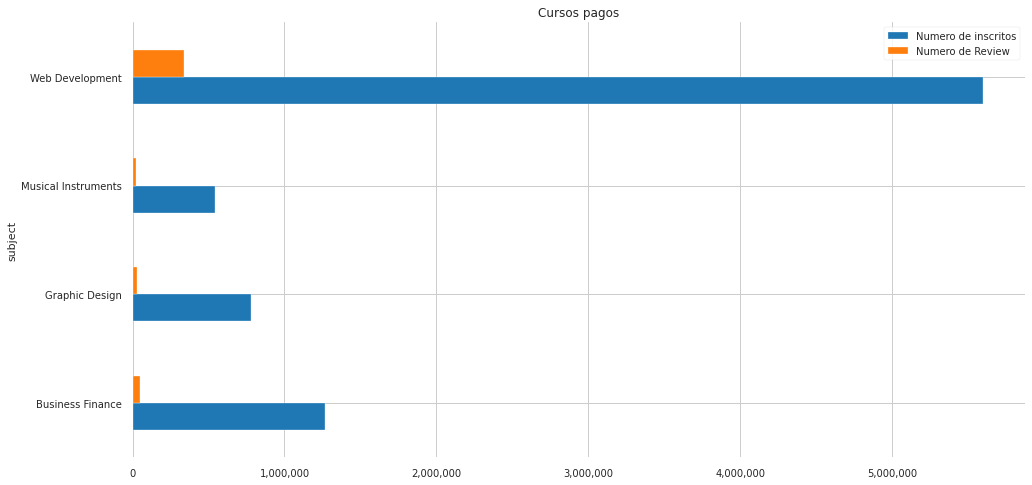

In [ ]:
dfPaid = df.copy()
dfPaid = dfPaid.loc[dfPaid['is_paid'] == True]
dfPaid = dfPaid[['num_subscribers','num_reviews','subject']]
dfPaid.index=dfPaid['subject']

dfPaidSum = dfPaid.groupby([dfPaid.index])['num_subscribers','num_reviews'].sum()

plotPaid = dfPaidSum.plot(kind='barh', figsize=(16, 8), rot=0, grid=True,ylim=(0,5500),title="Cursos pagos")
plotPaid.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plotPaid.legend(["Numero de inscritos", "Numero de Review"]);

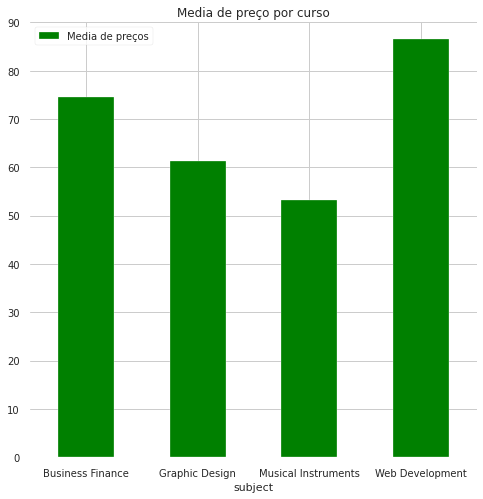

In [ ]:
dfPaidPrice = df.copy()
dfPaidPrice = dfPaidPrice.loc[dfPaidPrice['is_paid'] == True]
dfPaidPrice = dfPaidPrice[['price','subject']]
dfPaidPrice.index=dfPaid['subject']

dfPaidPrice = dfPaidPrice.groupby([dfPaidPrice.index])['price'].mean();


plotPaidMean = dfPaidPrice.plot(kind='bar', figsize=(8, 8), rot=0, grid=True,ylim=(0,90),title="Media de preço por curso", color ="green")
plotPaidMean.legend(["Media de preços"]);

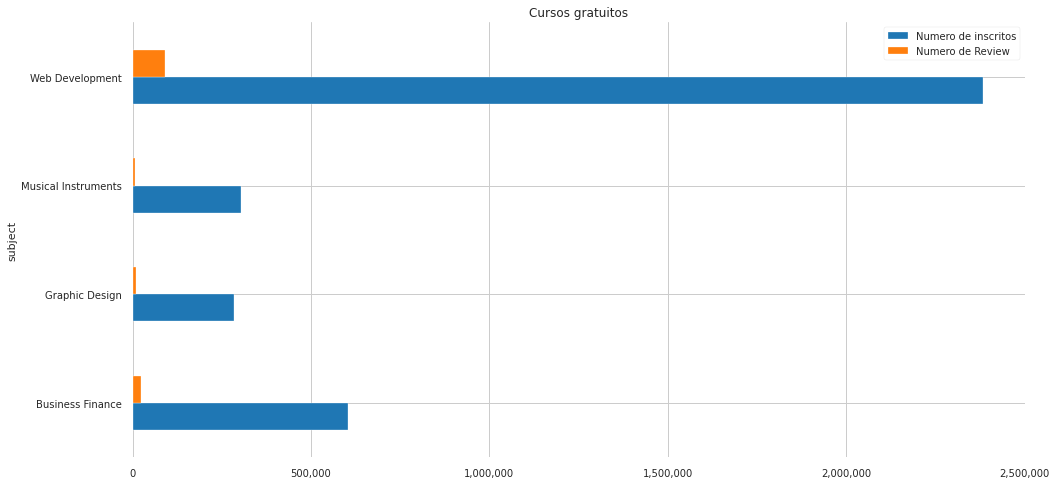

In [ ]:
dfNotPaid = df.copy()
dfNotPaid = dfNotPaid.loc[dfNotPaid['is_paid'] == False]
dfNotPaid = dfNotPaid[['num_subscribers','num_reviews','subject']]
dfNotPaid.index=dfNotPaid['subject']

dfNotPaid = dfNotPaid.groupby([dfNotPaid.index]).sum()

plotNotPaid = dfNotPaid.plot(kind='barh', figsize=(16, 8), rot=0, grid=True,ylim=(0,2500),title="Cursos gratuitos")
plotNotPaid.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
plotNotPaid.legend(["Numero de inscritos", "Numero de Review"]);

Analise de level por Subscribe e Reviwers

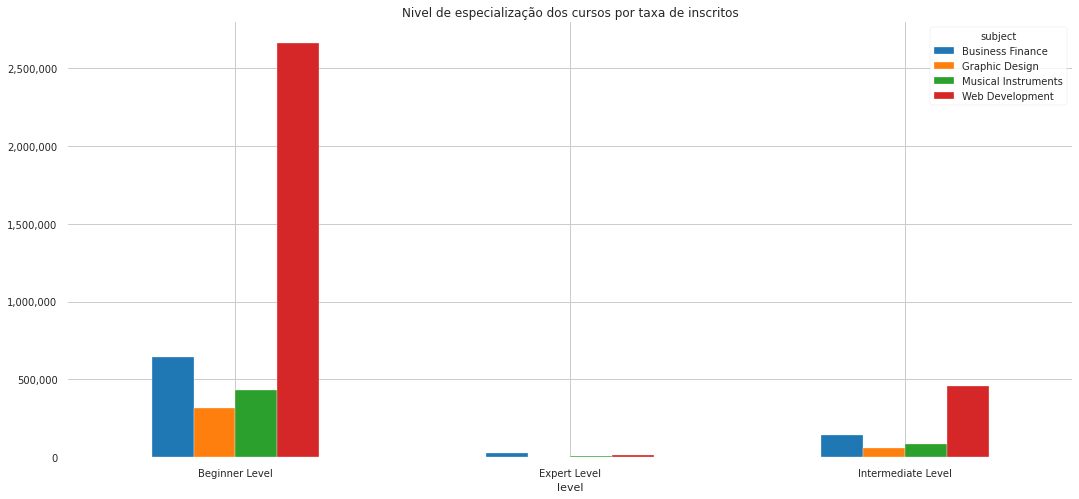

In [ ]:
dfLevelSubscribe = df.copy()
dfLevelSubscribe = dfLevelSubscribe.loc[dfLevelSubscribe['level'] != 'All Levels']
dfLevelSubscribe = dfLevelSubscribe[['num_subscribers','level','subject']]

dfLevelSubscribe = dfLevelSubscribe.groupby([dfLevelSubscribe['level'],dfLevelSubscribe['subject']])['num_subscribers'].sum()
dfLevelSubscribe = dfLevelSubscribe.unstack()
#dfLevelSubscribe

plotLevelSubscribe = dfLevelSubscribe.plot(kind='bar', figsize=(18, 8), rot=0, grid=True,title="Nivel de especialização dos cursos por taxa de inscritos")
plotLevelSubscribe.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

Categoria de cursos mais publicadas

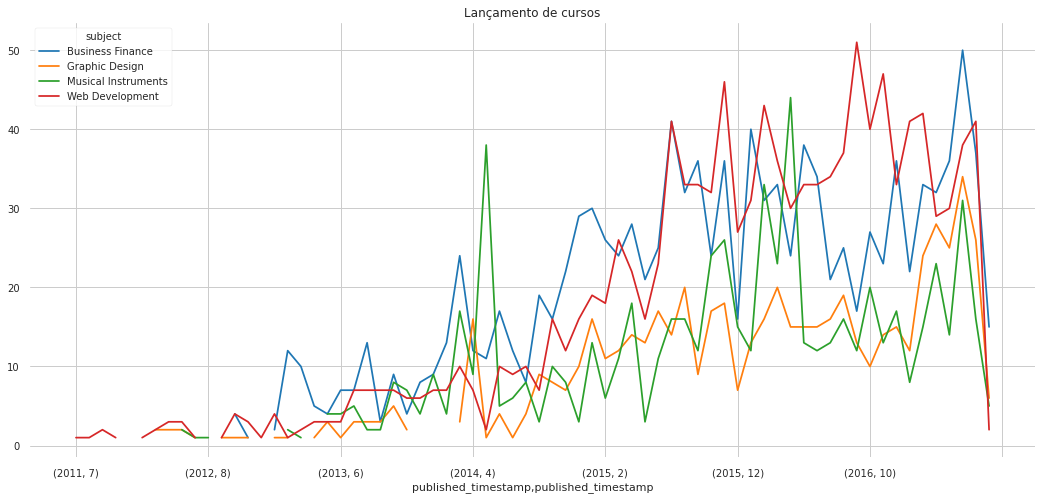

In [ ]:
dfCategoryByDate =  df.copy()
dfCategoryByDate = dfCategoryByDate[['published_timestamp','subject']]
dfCategoryByDate.index=dfCategoryByDate['published_timestamp']
dfCategoryByDate = dfCategoryByDate.groupby([dfCategoryByDate.index.year,
                                             dfCategoryByDate.index.month, 
                                             'subject']).size()
dfCategoryByDate = dfCategoryByDate.unstack()
plotCategoryByDate = dfCategoryByDate.plot(kind='line', figsize=(18, 8), rot=0,
                                           grid=True,title="Lançamento de cursos")

# Curiosidades


Curso mais caro e com mais inscritos?

In [ ]:
dfTop = df.copy()
dfTop.sort_values(by=['price','num_subscribers'], ascending=False)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development
1979,238934,Pianoforall - Incredible New Way To Learn Pian...,https://www.udemy.com/pianoforall-incredible-n...,True,200,75499,7676,362,All Levels,30.0,2014-08-07 06:27:51+00:00,Musical Instruments
1213,820194,Photoshop for Entrepreneurs - Design 11 Practi...,https://www.udemy.com/photoshop-for-entreprene...,True,200,36288,737,63,All Levels,5.0,2016-06-09 01:57:03+00:00,Graphic Design
3233,446134,Ultimate Web Designer & Developer Course: Buil...,https://www.udemy.com/web-developer-course/,True,200,33788,4434,246,All Levels,32.5,2015-08-20 20:55:19+00:00,Web Development
...,...,...,...,...,...,...,...,...,...,...,...,...
1208,1181578,Deinen Roman setzen mit PagePlus in 10 einfach...,https://www.udemy.com/deinen-roman-setzen-mit-...,False,0,69,6,25,All Levels,3.5,2017-04-24 16:44:12+00:00,Graphic Design
2421,592122,What you can learn before Piano Lessons,https://www.udemy.com/what-you-can-learn-befor...,False,0,61,1,31,Beginner Level,1.5,2015-09-01 20:54:52+00:00,Musical Instruments
1209,1261122,画像加工の初心者でも「１日」で初歩を覚えられる無料講座,https://www.udemy.com/1-tuqndy/,False,0,21,0,18,Beginner Level,1.0,2017-06-22 15:01:32+00:00,Graphic Design
1108,1268616,Condor Broken Wing Butterfly Options Trading C...,https://www.udemy.com/condor-broken-wing-butte...,False,0,16,0,15,All Levels,1.5,2017-07-06 19:47:16+00:00,Business Finance


Curso com maior numero de inscritos?

In [ ]:
dfTop2 = df.copy()
dfTop2.sort_values(by=['num_subscribers'], ascending=False)['url'].iloc[0]

'https://www.udemy.com/learn-html5-programming-from-scratch/'

Curso mais longo?


In [ ]:
dfTop3 = df.copy()
dfTop3.sort_values(by=['content_duration'], ascending=False)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1658,978576,The Complete Figure Drawing Course HD,https://www.udemy.com/the-complete-figure-draw...,True,50,1323,136,225,Beginner Level,78.500000,2016-10-11 21:40:06+00:00,Graphic Design
3141,548278,The Complete Web Development Course - Build 1...,https://www.udemy.com/complete-web-development...,True,200,7501,1213,384,All Levels,76.500000,2015-11-09 22:01:02+00:00,Web Development
561,375594,Financial Management - A Complete Study,https://www.udemy.com/financial-management-a-c...,True,190,1941,128,527,All Levels,71.500000,2014-12-22 16:57:30+00:00,Business Finance
874,167316,TRADER BOT: Introdução à Linguagem MQL5,https://www.udemy.com/intro-mql5/,True,20,209,33,33,All Levels,70.000000,2014-03-07 15:13:45+00:00,Business Finance
1214,62721,Anatomy for Figure Drawing: Mastering the Huma...,https://www.udemy.com/anatomy-for-figure-drawi...,True,95,15500,754,65,All Levels,68.500000,2013-10-16 11:37:30+00:00,Graphic Design
...,...,...,...,...,...,...,...,...,...,...,...,...
718,690546,UK Self Assessment Tax Return Filing Online,https://www.udemy.com/uk-tax-return/,True,20,23,7,6,All Levels,0.466667,2015-12-07 18:36:33+00:00,Business Finance
984,439210,Law Matters,https://www.udemy.com/law-matters/,True,20,327,1,12,Beginner Level,0.450000,2015-03-27 17:16:21+00:00,Business Finance
448,975074,ALGOTECH Hedge Fund Method for Stock Market Tr...,https://www.udemy.com/algotech-hedge-fund-meth...,True,20,605,19,4,All Levels,0.316667,2016-10-10 21:05:19+00:00,Business Finance
116,1191504,How to create a routine Trading,https://www.udemy.com/how-to-create-a-trading-...,True,25,307,8,5,All Levels,0.133333,2017-05-01 18:50:43+00:00,Business Finance


*   Numero de cursos no total? 
*   Quanto as pessoas ja pagaram em cursos online?
*   Quanto tempo de curso existe no total?

In [ ]:
dfTop4 = df.copy()

dfTopPaid = dfTop4.copy()
dfTopPaid = dfTopPaid.loc[dfTopPaid['is_paid'] == True]
dfTopPaid = dfTopPaid[['price','num_subscribers']]
dfTopPaid = dfTopPaid['price'].multiply(dfTopPaid["num_subscribers"]).sum()

dfTopDuration = dfTop4.copy()
dfTopDuration = dfTopDuration['content_duration'].sum()



print("Numero de cursos no total?",dfTop4['course_id'].count(),' Cursos');
print("Quanto as pessoas ja pagaram em cursos online? $",dfTopPaid,' Dolares');
print("Quanto tempo de curso existe no total?",round(dfTopDuration),' Horas ou ', round(dfTopDuration/24),' ou Dias', round((dfTopDuration/24)/30),' Meses');

Numero de cursos no total? 3678  Cursos
Quanto as pessoas ja pagaram em cursos online? $ 884921315  Dolares
Quanto tempo de curso existe no total? 15060  Horas ou  627  ou Dias 21  Meses
